In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("predictive_maintenance_dataset.csv")

# Drop non-numeric columns (like date, device)
df = df.drop(['date', 'device'], axis=1)

# Features and target
X = df.drop('failure', axis=1)
y = df['failure']

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Train a full decision tree
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
print(f"Accuracy before pruning: {accuracy_score(y_val, y_pred) * 100:.2f}%")

Accuracy before pruning: 99.87%


In [11]:
# Get pruning path
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
clfs = []

In [12]:
# Train trees with different ccp_alphas
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

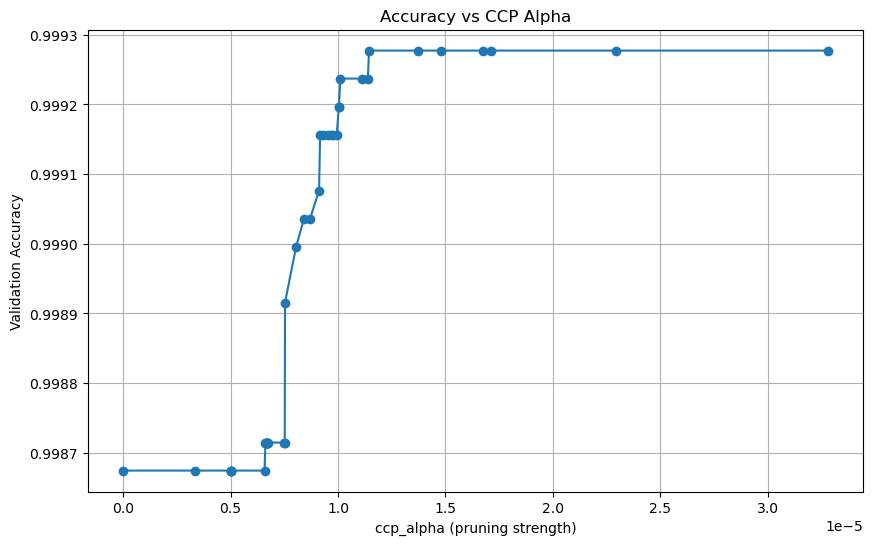

In [13]:
# Evaluate accuracy for each tree
val_scores = [accuracy_score(y_val, clf.predict(X_val)) for clf in clfs]

# Plot pruning curve
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, val_scores, marker='o')
plt.xlabel("ccp_alpha (pruning strength)")
plt.ylabel("Validation Accuracy")
plt.title("Accuracy vs CCP Alpha")
plt.grid(True)
plt.show()

In [14]:
#Pick best tree
best_idx = val_scores.index(max(val_scores))
best_tree = clfs[best_idx]
print(f"Best validation accuracy after pruning: {val_scores[best_idx] * 100:.2f}%")

Best validation accuracy after pruning: 99.93%


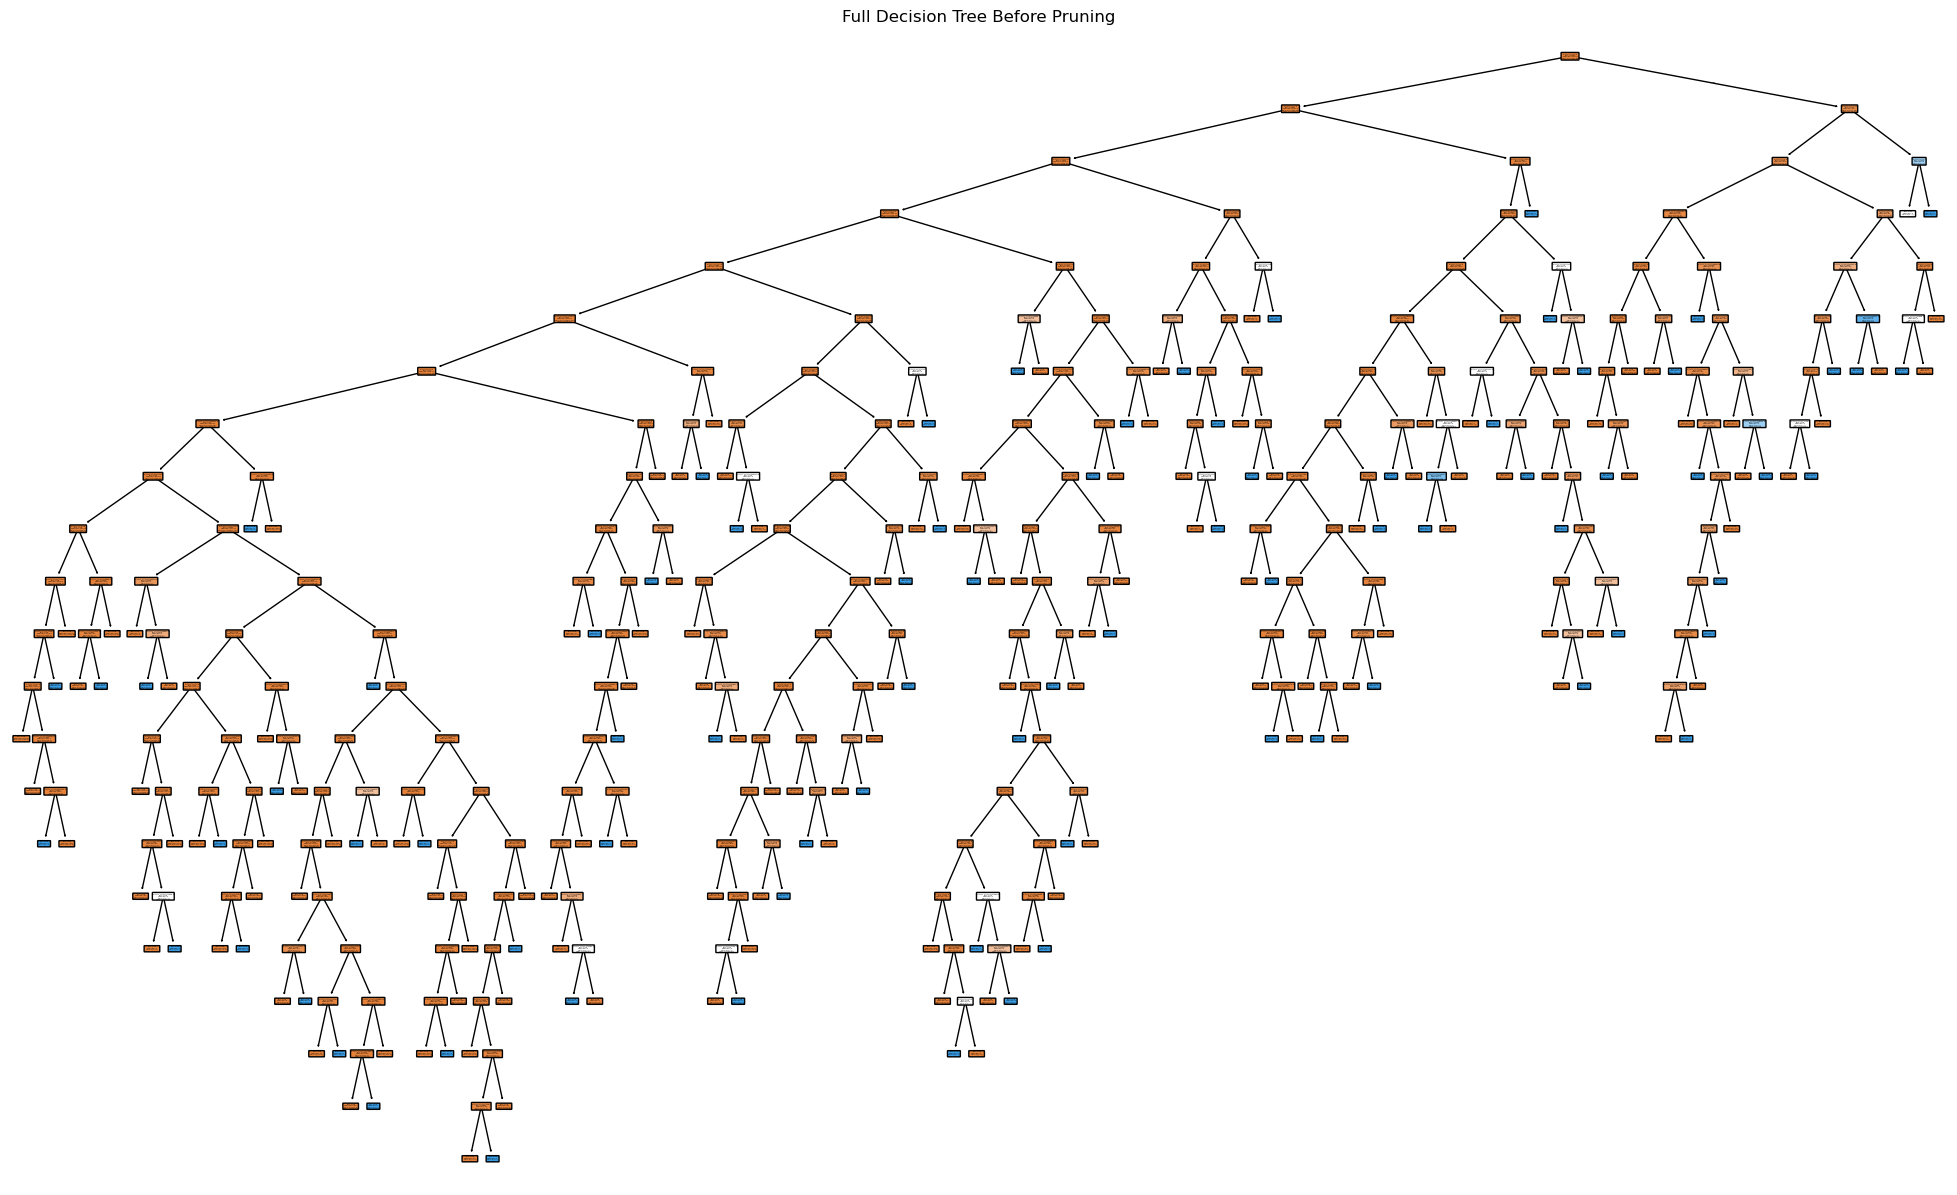

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 15))
plot_tree(clfs[0], 
          feature_names=X.columns,
          class_names=["No Failure", "Failure"],
          filled=True,
          rounded=True)

plt.title("Full Decision Tree Before Pruning")
plt.show()


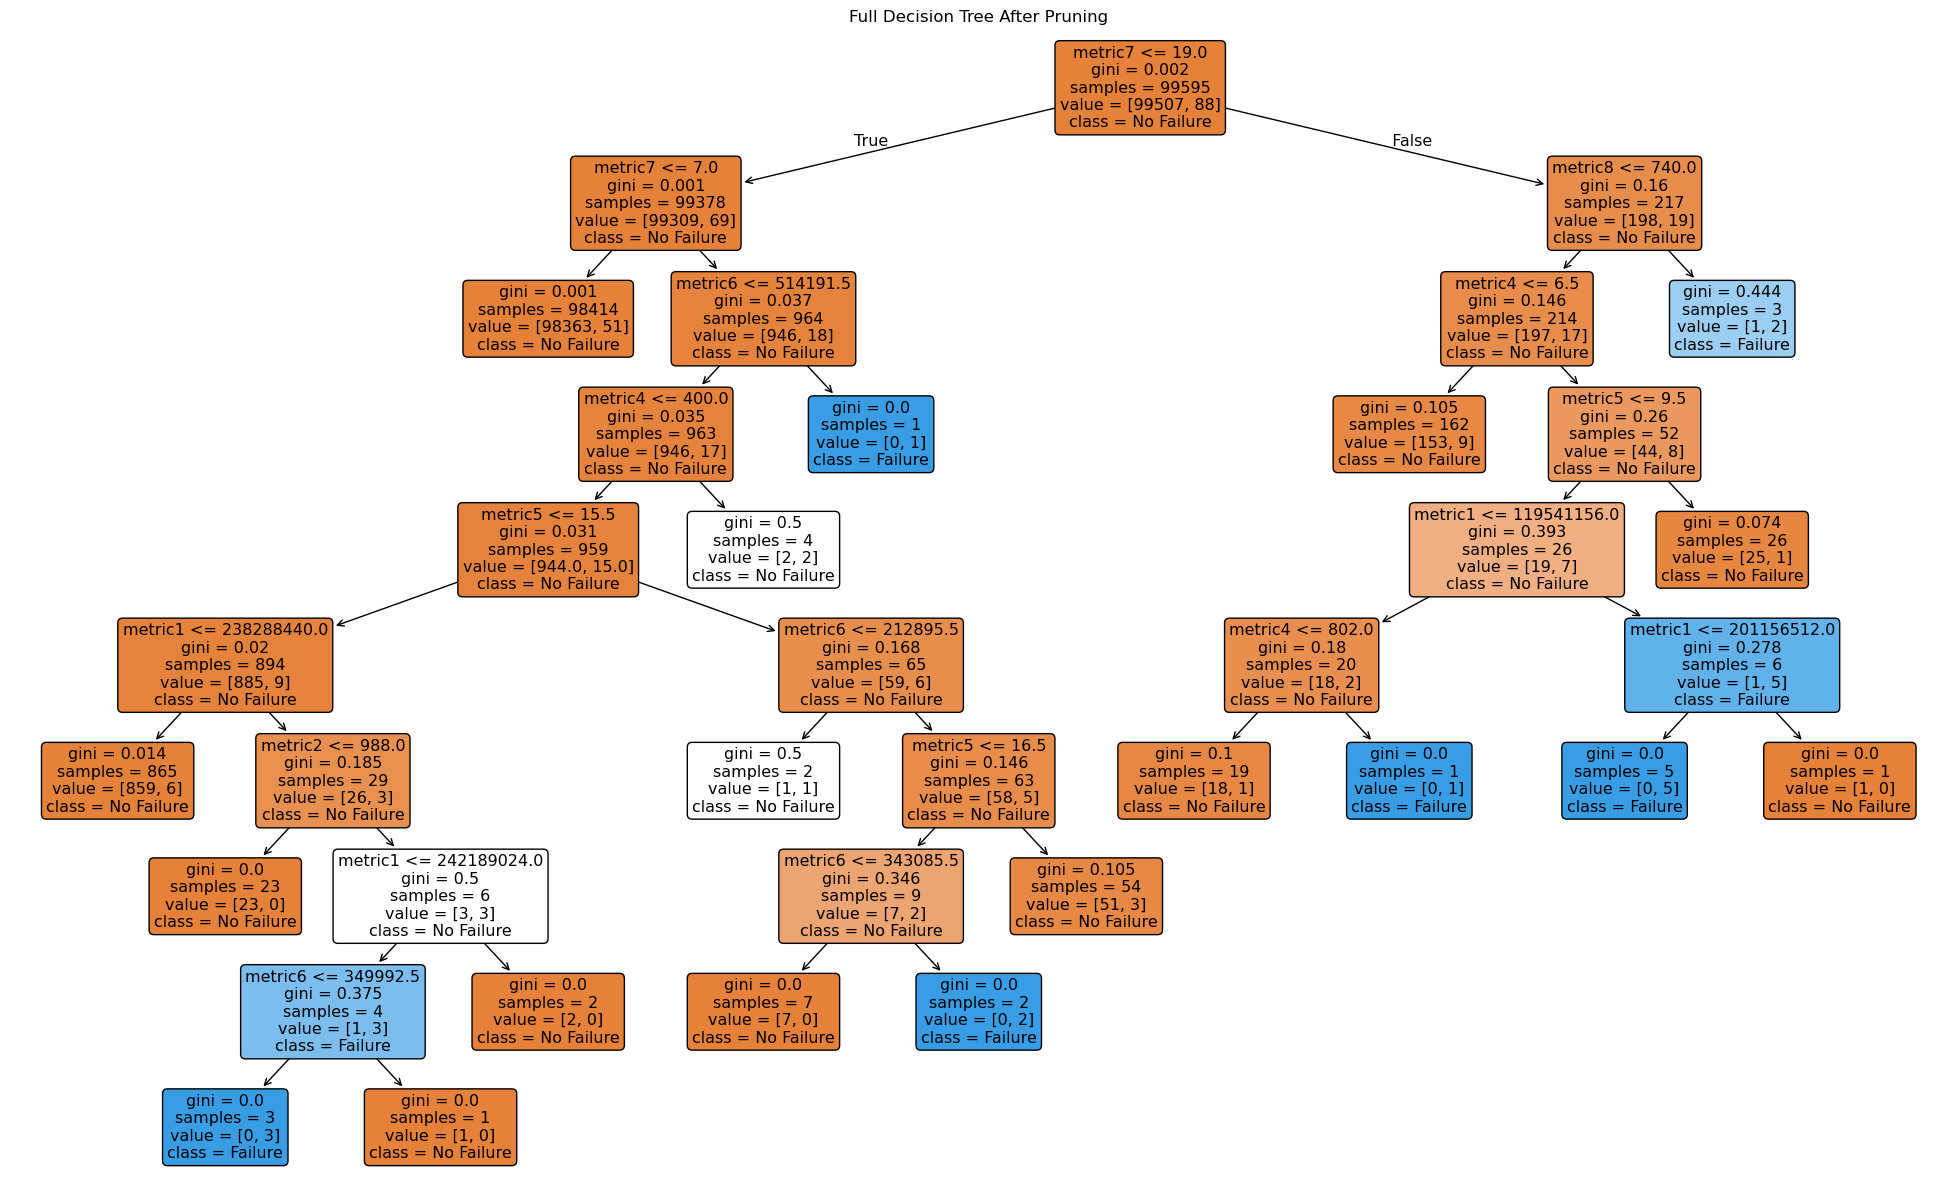

In [16]:
plt.figure(figsize=(25, 15))
plot_tree(best_tree, 
          feature_names=X.columns,
          class_names=["No Failure", "Failure"],
          filled=True,
          rounded=True)

plt.title("Full Decision Tree After Pruning")
plt.show()